In [1]:
import json
import re
import subprocess
import sys
import urllib

import ensembl_rest
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import helperFiles.buildplot as plotBuilder
import helperFiles.getUniprotRanges as proteinRanges
import buildPlotWithDomains as domainBuilder

In [2]:
startAndEndJson = json.load(urllib.request.urlopen(
        "https://dcc.icgc.org/api/v1/genes/ENSG00000182185"))  # lift this
start = plotBuilder.lift(startAndEndJson['start'])
end = plotBuilder.lift(startAndEndJson['end'])

In [3]:
ranges = domainBuilder.buildRanges()

query=gene%3Arad51b+organism%3Ahuman&format=list&columns=id&limit=1
O15315
yee
('1', '384')
yo
yee
('108', '115')
yo
yee
('1', '75')
yo
yee
('252', '253')
yo
yee
('1', '119')
yo
yee
('346', '384')
yo
yee
('346', '384')
yo
yee
('347', '384')
yo


In [4]:
print(ranges)

{'DNA repair protein RAD51 homolog 2': [('67823544', '67823627'), ('67835080', '67835196'), ('68468172', '68468250'), ('68291884', '68291980'), ('68594485', '68594600'), ('67885869', '67885988'), ('67825464', '67825577'), ('67887021', '67887204'), ('67865003', '67865139'), ('68411424', '68411527')], 'ATP': [('67865009', '67865032')], 'Interaction with RAD51C': [('67823544', '67823627'), ('67835080', '67835106'), ('67825464', '67825577')], 'Breakpoint for translocation to form HMGA2-RAD51B': [('68291884', '68291886'), ('67887202', '67887204')], 'In isoform 5.': [('67865003', '67865044'), ('67823544', '67823627'), ('67835080', '67835196'), ('67825464', '67825577')], 'In isoform 2.': [('68594485', '68594600')], 'In isoform 3 and isoform 5.': [('68594485', '68594600')], 'In isoform 4.': [('68594487', '68594600')]}


In [5]:
data = np.zeros((len(ranges)))

In [6]:
from pyliftover import LiftOver
lo = LiftOver('hg19', 'hg38')
def lift(coord):
    return lo.convert_coordinate('chr14', coord)[0][1]

In [7]:
numberOfSeqs = json.load(urllib.request.urlopen(
        "http://dcc.icgc.org/api/v1/genes/ENSG00000182185/mutations/count"))
counter = 0
to_nearest_hunderd = 101 - (numberOfSeqs % 100)
placeInGenome = []
numberOfOccurences = []
#
print(data)
for i in range(0, numberOfSeqs+to_nearest_hunderd, 100):
    try:
        json_file = json.load(urllib.request.urlopen(
            f"https://dcc.icgc.org/api/v1/genes/ENSG00000182185/mutations?from={i}&size=100"))
    except:
        print(f"{i} got messed")
    print(i)

    for hit in json_file['hits']:
        if hit['type'] == 'single base substitution':
            counter = 0
            for j in ranges:
                for k in range(len(ranges[j])):
                    if(lift(hit['start']) in range(int(ranges[j][k][0]), int(ranges[j][k][1]))):
                        data[counter]+=1
                counter +=1

[0. 0. 0. 0. 0. 0. 0. 0.]
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000


In [8]:
print(data)

[97.  3. 25.  0. 32.  4.  4.  4.]


In [9]:
listedData = data.tolist()
listedData

[97.0, 3.0, 25.0, 0.0, 32.0, 4.0, 4.0, 4.0]

In [18]:
labels = []
for i in ranges:
    labels.append(i)
listedData = []
for j in ranges:
    length = 0
    print(j)
    for rang in ranges[j]:
        print(rang)
        length+= int(rang[1]) - int(rang[0])
    listedData.append(length)
listedData

newData = []

for k in range(0, len(data)):
    newData.append(data[k]/listedData[k])
newData

DNA repair protein RAD51 homolog 2
('67823544', '67823627')
('67835080', '67835196')
('68468172', '68468250')
('68291884', '68291980')
('68594485', '68594600')
('67885869', '67885988')
('67825464', '67825577')
('67887021', '67887204')
('67865003', '67865139')
('68411424', '68411527')
ATP
('67865009', '67865032')
Interaction with RAD51C
('67823544', '67823627')
('67835080', '67835106')
('67825464', '67825577')
Breakpoint for translocation to form HMGA2-RAD51B
('68291884', '68291886')
('67887202', '67887204')
In isoform 5.
('67865003', '67865044')
('67823544', '67823627')
('67835080', '67835196')
('67825464', '67825577')
In isoform 2.
('68594485', '68594600')
In isoform 3 and isoform 5.
('68594485', '68594600')
In isoform 4.
('68594487', '68594600')


[0.08493870402802102,
 0.13043478260869565,
 0.11261261261261261,
 0.0,
 0.0906515580736544,
 0.034782608695652174,
 0.034782608695652174,
 0.035398230088495575]

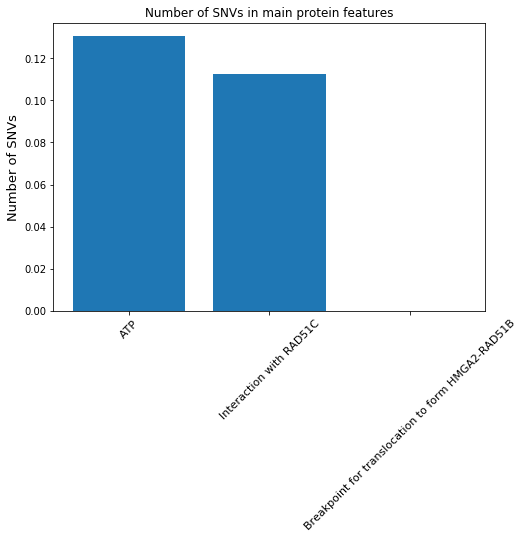

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = labels[1:4]
students = newData[1:4]
plt.xticks(rotation=45, fontsize=11)
ax.bar(langs,students)
plt.title("Number of SNVs in main protein features")
plt.ylabel("Number of SNVs", fontsize=13)
plt.show()